In [1]:
import anndata
import numpy as np
import pandas as pd
import autogenes as ag
import anndata
import scanpy as sc
import os
import sys


In [2]:
sys.version

'3.9.6 (default, Aug 18 2021, 19:38:01) \n[GCC 7.5.0]'

In [3]:
def normalize_proportions2(data,copy):
    if copy==True:
        data_copy = data.copy()
    else:
        data_copy = data
    data_copy[data_copy < 0] = 0
    for raw in data_copy.index:
        sum = data_copy.loc[raw].sum()
        data_copy.loc[raw] = np.divide(data_copy.loc[raw],sum)
    return data_copy

In [4]:
bulk_dataDV = pd.read_csv('/home/ies/mayra.ruiz/nose3Ddata/newDV_AllGenes_normalized_rpm_repsAvg_mks.csv',index_col=0).transpose()
bulk_dataLML = pd.read_csv('/home/ies/mayra.ruiz/nose3Ddata/newLML_AllGenes_normalized_rpm_repsAvg_mks.csv',index_col=0).transpose()
bulk_dataAP = pd.read_csv('/home/ies/mayra.ruiz/nose3Ddata/newAP_AllGenes_normalized_rpm_repsAvg_mks.csv',index_col=0).transpose()

adata = pd.read_csv('/home/ies/mayra.ruiz/nose3Ddata/scTPMs.csv',index_col=0)
adata

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,15-23,15-24,15-25,15-26,15-27,15-28,15-29,15-30,15-31,15-32
Xkr4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LOC102640625,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LOC102640704,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Xkr9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LOC102638355,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rap1gap,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.93,0.00
Rap1gapos,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Alpl,0.00,0.00,0.00,128.80,0.00,0.00,0.00,0.00,0.00,0.00,...,2.16,0.00,0.00,1.54,0.00,0.00,0.00,0.00,0.00,0.00
LOC102634516,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
adata = anndata.AnnData(adata).transpose()
adata.obs['Cell_type']=[s.split("-", 1)[0] for s in adata.obs_names]
adata

AnnData object with n_obs × n_vars = 616 × 42035
    obs: 'Cell_type'

In [6]:
noOlfrs=[name for name in adata.var_names if not 'Olfr' in name]

In [7]:
adata=adata[:, noOlfrs]
adata

View of AnnData object with n_obs × n_vars = 616 × 40717
    obs: 'Cell_type'

In [8]:
#Cell types to use
#1-HBC
#2-INP
#3-GBC
#4-SC
#5-iOSN
#6-MVC
#7-mOSN

#Cell types to use 2nd try
#1-HBC
#2-INP
#3-GBC
#4-SC
#5-OSN
#6-MVC

In [9]:
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='1') | (adata.obs['Cell_type']=='5') | (adata.obs['Cell_type']=='8')] = '1'
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='2') | (adata.obs['Cell_type']=='10') | (adata.obs['Cell_type']=='14')] = '2'
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='4') | (adata.obs['Cell_type']=='7')] = '4'
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='9')] = '5'
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='11') | (adata.obs['Cell_type']=='15')] = '6'
#adata.obs['Cell_type'][(adata.obs['Cell_type']=='12')] = '7'

adata.obs['Cell_type'][(adata.obs['Cell_type']=='1') | (adata.obs['Cell_type']=='5') | (adata.obs['Cell_type']=='8')] = '1'
adata.obs['Cell_type'][(adata.obs['Cell_type']=='2') | (adata.obs['Cell_type']=='10') | (adata.obs['Cell_type']=='14')] = '2'
adata.obs['Cell_type'][(adata.obs['Cell_type']=='4') | (adata.obs['Cell_type']=='7')] = '4'
adata.obs['Cell_type'][(adata.obs['Cell_type']=='9') | (adata.obs['Cell_type']=='12')] = '5'
adata.obs['Cell_type'][(adata.obs['Cell_type']=='11') | (adata.obs['Cell_type']=='15')] = '6'



In [10]:
np.unique(adata.obs['Cell_type'])

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [11]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

/home/ies/mayra.ruiz/miniconda3/envs/EOenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:373: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
ag.init(adata,use_highly_variable=True,celltype_key='Cell_type')

AnnData object with n_obs × n_vars = 6 × 40717
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [13]:
ag.optimize(ngen=5000,nfeatures=400,seed=0,mode='fixed')

gen	nevals	pareto	correlation	distance       
0  	100   	4     	6.3 - 9.56 	134.44 - 220.86
1  	100   	4     	6.3 - 9.27 	163.39 - 220.86
2  	100   	6     	5.75 - 8.1 	163.39 - 220.92
3  	100   	7     	5.72 - 8.12	165.26 - 233.71
4  	100   	6     	5.69 - 8.12	175.03 - 233.71
5  	100   	5     	5.69 - 8.12	182.29 - 233.71
6  	100   	7     	5.69 - 8.12	182.29 - 233.71
7  	100   	7     	5.69 - 8.12	182.29 - 233.71
8  	100   	8     	5.67 - 8.12	182.29 - 233.71
9  	100   	5     	5.53 - 8.08	182.29 - 233.71
10 	100   	5     	5.53 - 7.36	193.6 - 233.71 
11 	100   	7     	5.53 - 7.36	193.6 - 233.71 
12 	100   	6     	5.52 - 7.36	193.6 - 233.71 
13 	100   	6     	5.52 - 7.36	193.6 - 233.71 
14 	100   	8     	5.52 - 7.36	193.61 - 233.79
15 	100   	8     	5.43 - 7.1 	201.46 - 233.79
16 	100   	8     	5.43 - 7.1 	201.46 - 233.79
17 	100   	11    	5.43 - 7.84	201.48 - 236.78
18 	100   	11    	5.43 - 7.84	201.48 - 236.78
19 	100   	11    	5.43 - 7.84	201.49 - 236.78
20 	100   	11    	5.42 - 7.88	201.

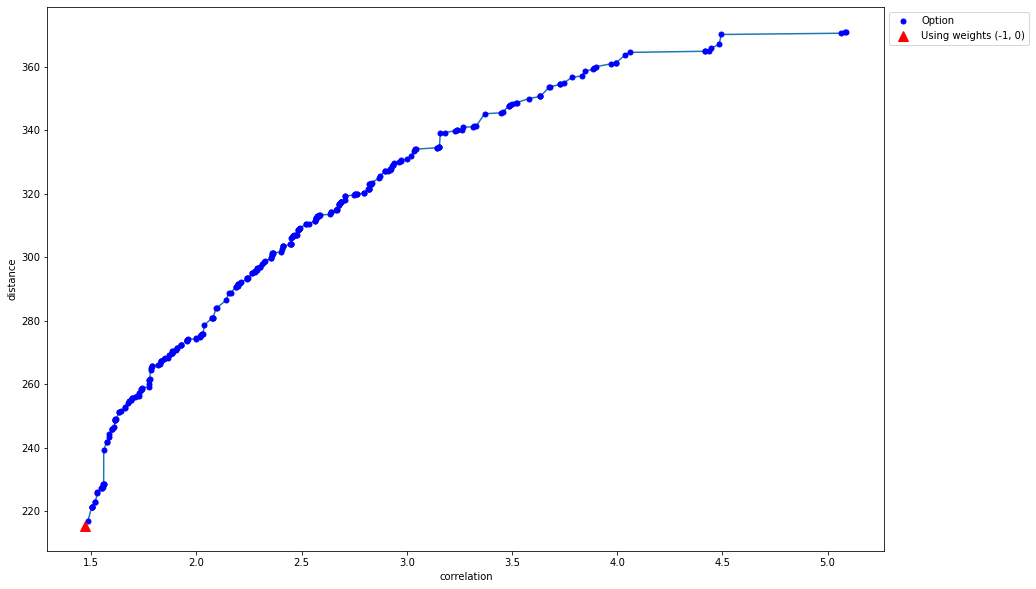

In [14]:
ag.plot(weights=(-1,0))

In [15]:
clusters = np.unique(adata.obs['Cell_type'])
clusters

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [16]:
index = ag.select(index=0)
len(index)

40717

In [17]:
#ag.select(close_to=(1,75))
#ag.select(index=0)

In [18]:
ag_genes=adata.var_names[index]
ag_genes = pd.DataFrame(data={"genes": ag_genes})
ag_genes.to_csv("./ag_genes4deconv_T3.csv")

In [19]:
os.getcwd()

'/home/ies/mayra.ruiz/embryonicOrganoids'

In [20]:
adata.obs['Cell_type']

1-1      1
1-2      1
1-3      1
1-4      1
1-5      1
        ..
15-28    6
15-29    6
15-30    6
15-31    6
15-32    6
Name: Cell_type, Length: 616, dtype: object

In [21]:
bulk_dataDV.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '50', '51', '52', '53', '54'],
      dtype='object')

In [22]:
coef = ag.deconvolve(bulk_dataDV, model='nnls')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataDV.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nnls_DV.csv")
coef_array.to_csv("./cellTypesProps_nnls_T3_DV.csv")

#coef_array=np.asarray(coef)
#np.savetxt("./cellTypesProps_nnls_DV.csv", coef_array)

/home/ies/mayra.ruiz/miniconda3/envs/EOenv/lib/python3.9/site-packages/autogenes/interface.py:475: UserWarning: Some of the selected genes don't appear in the bulk data and will be ignored
  warnings.warn("Some of the selected genes don't appear in the bulk data and will be ignored")


In [23]:
coef = ag.deconvolve(bulk_dataLML, model='nnls')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataLML.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nnls_LML.csv")
coef_array.to_csv("./cellTypesProps_nnls_T3_LML.csv")

In [24]:
coef = ag.deconvolve(bulk_dataAP, model='nnls')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataAP.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nnls_AP.csv")
coef_array.to_csv("./cellTypesProps_nnls_T3_AP.csv")

In [25]:
coef = ag.deconvolve(bulk_dataDV, model='nusvr')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataDV.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nusvr_DV.csv")
coef_array.to_csv("./cellTypesProps_nusvr_T3_DV.csv")

In [26]:
coef = ag.deconvolve(bulk_dataLML, model='nusvr')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataLML.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nusvr_LML.csv")
coef_array.to_csv("./cellTypesProps_nusvr_T3_LML.csv")

/home/ies/mayra.ruiz/miniconda3/envs/EOenv/lib/python3.9/site-packages/autogenes/interface.py:475: UserWarning: Some of the selected genes don't appear in the bulk data and will be ignored
  warnings.warn("Some of the selected genes don't appear in the bulk data and will be ignored")


In [27]:
coef = ag.deconvolve(bulk_dataAP, model='nusvr')
coef_array = normalize_proportions2(pd.DataFrame(data=coef,columns=clusters,index=bulk_dataAP.index), copy = False)
#coef_array.to_csv("./cellTypesProps_nusvr_AP.csv")
coef_array.to_csv("./cellTypesProps_nusvr_T3_AP.csv")

/home/ies/mayra.ruiz/miniconda3/envs/EOenv/lib/python3.9/site-packages/autogenes/interface.py:475: UserWarning: Some of the selected genes don't appear in the bulk data and will be ignored
  warnings.warn("Some of the selected genes don't appear in the bulk data and will be ignored")
